In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

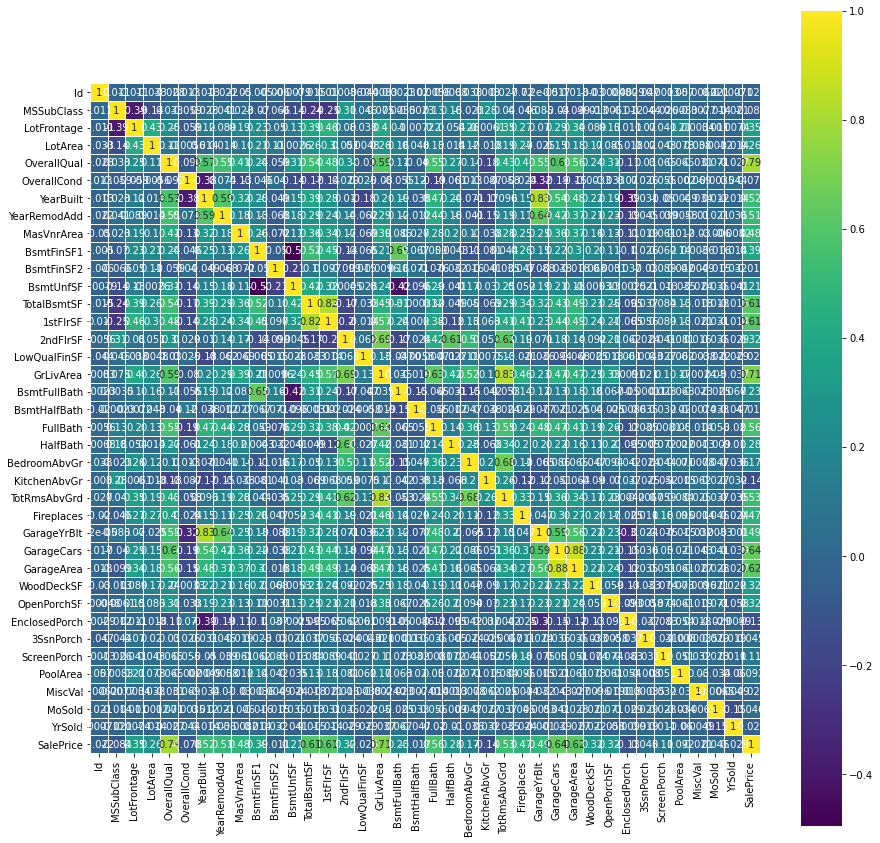

In [4]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(house_prices_df.corr(),  square=True, annot=True, linewidths=.5, cmap='viridis',ax=ax)

In [5]:
house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd","SalePrice"]].corr()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd,SalePrice
OverallQual,1.000000,0.572323,0.537808,0.593007,0.550600,0.600671,0.562022,0.427452,0.790982
YearBuilt,0.572323,1.000000,0.391452,0.199010,0.468271,0.537850,0.478954,0.095589,0.522897
TotalBsmtSF,0.537808,0.391452,1.000000,0.454868,0.323722,0.434585,0.486665,0.285573,0.613581
GrLivArea,0.593007,0.199010,0.454868,1.000000,0.630012,0.467247,0.468997,0.825489,0.708624
FullBath,0.550600,0.468271,0.323722,0.630012,1.000000,0.469672,0.405656,0.554784,0.560664
GarageCars,0.600671,0.537850,0.434585,0.467247,0.469672,1.000000,0.882475,0.362289,0.640409
GarageArea,0.562022,0.478954,0.486665,0.468997,0.405656,0.882475,1.000000,0.337822,0.623431
TotRmsAbvGrd,0.427452,0.095589,0.285573,0.825489,0.554784,0.362289,0.337822,1.000000,0.533723
SalePrice,0.790982,0.522897,0.613581,0.708624,0.560664,0.640409,0.623431,0.533723,1.000000


In [6]:
y = house_prices_df["SalePrice"]
x = house_prices_df[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd"]]

In [7]:
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     604.0
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:                -17474.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1451   BIC:                         3.501e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.342e+05   9.13e+04     -8.046      0.000   -9.13e+05   -5.55e+05
OverallQual   2.055e+04   1159.417     17.724      0.000    1.83e+04    2.28e+04
YearBuilt      334.8758     47.853      6.998      0.000     241.007     428.745
TotalBsmtSF     28.2315      2.917      9.678      0.000      22.509      33.954
GrLivArea       53.7550      4.187     12.838      0.000      45.542      61.968
FullBath     -5042.0409   2688.082     -1.876      0.061   -1.03e+04     230.902
GarageCars    1.074e+04   3072.603      3.496      0.000    4716.098    1.68e+04
GarageArea      16.4580     10.386      1.585      0.113      -3.915      36.831
TotRmsAbvGrd   -77.4147   1129.395     -0.069      0.945   -2292.836    2138.006
==============================================================================
Omnibus:                      477.040   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54777.984
Skew:                          -0.438   Prob(JB):                         0.00
Kurtosis:                      32.995   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""